In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stat

In [2]:
mul,sigl = 50,10

In [3]:
s = np.random.normal(mul,sigl,100)

(array([ 1.,  9.,  6., 13., 17., 17., 20.,  7.,  7.,  3.]),
 array([27.53186515, 31.72770072, 35.92353628, 40.11937185, 44.31520742,
        48.51104298, 52.70687855, 56.90271412, 61.09854968, 65.29438525,
        69.49022081]),
 <BarContainer object of 10 artists>)

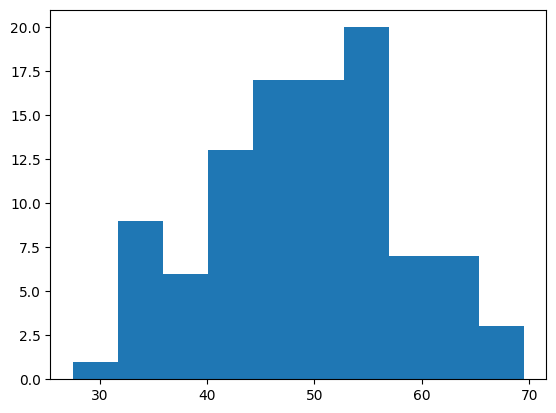

In [4]:
plt.hist(s)

In [5]:
s[85] = 120
s[15]=-120

(array([ 1.,  0.,  0.,  0.,  0.,  0., 44., 54.,  0.,  1.]),
 array([-120.,  -96.,  -72.,  -48.,  -24.,    0.,   24.,   48.,   72.,
          96.,  120.]),
 <BarContainer object of 10 artists>)

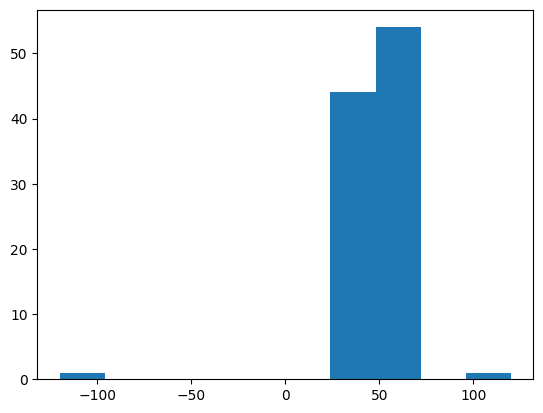

In [6]:
plt.hist(s)

In [7]:
df = pd.DataFrame(s,columns=['Data'])
df.head()

,Data
0,51.367802
1,55.682911
2,62.476703
3,59.033163
4,55.336152


In [8]:
for col in df.columns:
    col_zscore = col+'_zsroce'
    df[col_zscore] = (df[col]-df[col].mean())/df[col].std(ddof = 0)

In [9]:
df.head()

,Data,Data_zsroce
0,51.367802,0.167495
1,55.682911,0.380754
2,62.476703,0.716513
3,59.033163,0.546328
4,55.336152,0.363617


In [11]:
df['Outlier'] = (abs(df['Data_zsroce'])>3).astype(int)

In [12]:
df.head()

,Data,Data_zsroce,Outlier
0,51.367802,0.167495,0
1,55.682911,0.380754,0
2,62.476703,0.716513,0
3,59.033163,0.546328,0
4,55.336152,0.363617,0


In [13]:
np.count_nonzero(df.Outlier)

2

In [14]:
df.loc[df.Outlier==1]

,Data,Data_zsroce,Outlier
15,-120.0,-8.301758,1
85,120.0,3.559401,1


In [15]:
print("Number of Outlier: "+str(df.Outlier.value_counts()[1]))

Number of Outlier: 2
